# Prophet Univariate

In [ ]:
!pip install fbprophet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [4]:
df = pd.read_csv('/content/drive/MyDrive/nyc_energy_consumption.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [8]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [9]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [10]:
ny_df=df.set_index('timeStamp')

In [11]:
ny_df.head()

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


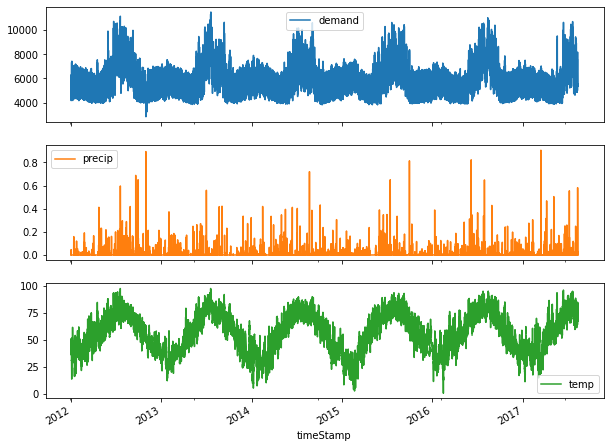

In [12]:
ny_df.plot(subplots=True);

In [13]:
ny_df.resample('D').mean()

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2017-08-08,6471.626042,0.000000,71.039167
2017-08-09,6811.112167,0.047529,73.852500
2017-08-10,5582.297000,0.002033,75.217500


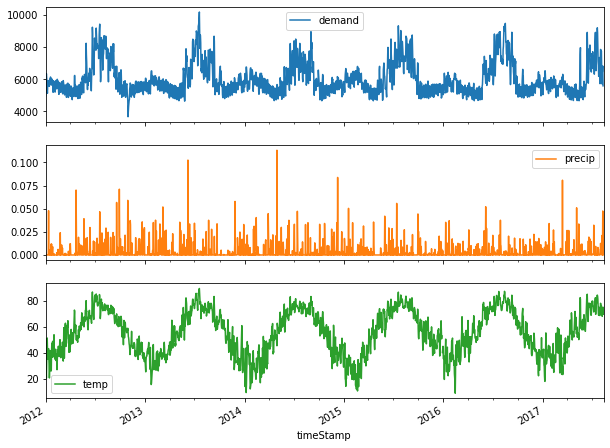

In [14]:
ny_df.resample('D').mean().plot(subplots=True);

In [15]:
ny_df_daily=ny_df.resample('D').mean()

y(t)= g(t) + s(t) + h(t) + εt

In [16]:
from fbprophet import Prophet

In [17]:
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand']].rename({'timeStamp':'ds','demand':'y'}, axis='columns')

In [18]:
ny_df_final

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5582.297000
2049,2017-08-11,NaN


In [19]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-05-04')]
test=ny_df_final[(ny_df_final['ds'] > '2017-05-04')]

In [20]:
train.shape

(1951, 2)

In [21]:
test.shape

(100, 2)

In [22]:
test

,ds,y
1951,2017-05-05,5358.639500
1952,2017-05-06,4850.361500
1953,2017-05-07,4668.315958
1954,2017-05-08,5244.323958
1955,2017-05-09,5274.153125
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5582.297000
2049,2017-08-11,NaN


In [23]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [24]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
m.params

{'beta': array([[-0.03467462, -0.07050771,  0.05762265,  0.04707594, -0.01407432,
         -0.00503465, -0.00389491, -0.00072319,  0.0024471 , -0.00754326,
          0.0040443 ,  0.00479875, -0.00792032, -0.004679  ,  0.00704769,
         -0.0026768 , -0.00128906,  0.0016758 ,  0.00033154, -0.00019135,
         -0.02824752,  0.02380884,  0.02064843,  0.00050928, -0.00492803,
         -0.00501149]]),
 'delta': array([[ 4.60233116e-08, -9.43784938e-09, -1.02768641e-01,
          4.56875012e-09,  1.75888544e-07,  8.64468908e-08,
         -2.08019805e-08, -5.60767797e-08, -7.97433307e-08,
         -1.04572125e-08, -1.37939966e-02, -9.06420559e-02,
         -6.11556026e-07,  4.26087542e-09,  2.41287942e-01,
          9.25625376e-08, -1.02278039e-05, -7.90510124e-02,
         -5.17934870e-02, -4.19504056e-07, -9.71088958e-08,
          1.52488727e-07,  5.34120596e-03,  7.16473836e-03,
          5.53628268e-09]]),
 'k': array([[0.08806049]]),
 'm': array([[0.59361005]]),
 'sigma_obs': array([

In [26]:
future = m.make_future_dataframe(periods=100)
future.tail()

,ds
2046,2017-08-08
2047,2017-08-09
2048,2017-08-10
2049,2017-08-11
2050,2017-08-12


In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2046,2017-08-08,7590.571481,6672.101491,8527.591246
2047,2017-08-09,7578.436506,6668.096566,8556.964271
2048,2017-08-10,7532.833695,6638.190253,8428.218737
2049,2017-08-11,7489.042891,6546.262463,8479.861482
2050,2017-08-12,6914.205598,6023.116554,7901.381336


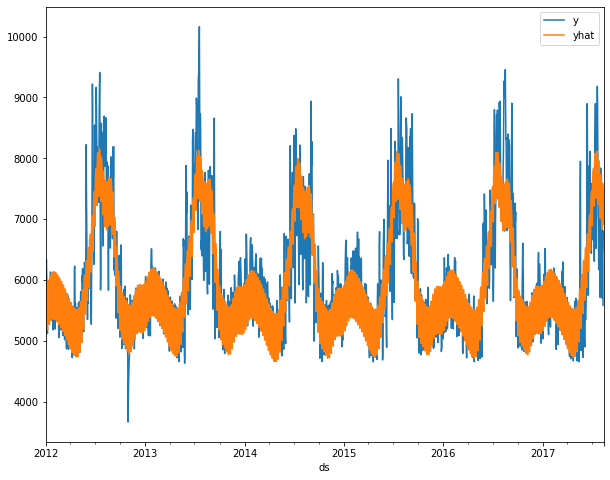

In [28]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot();

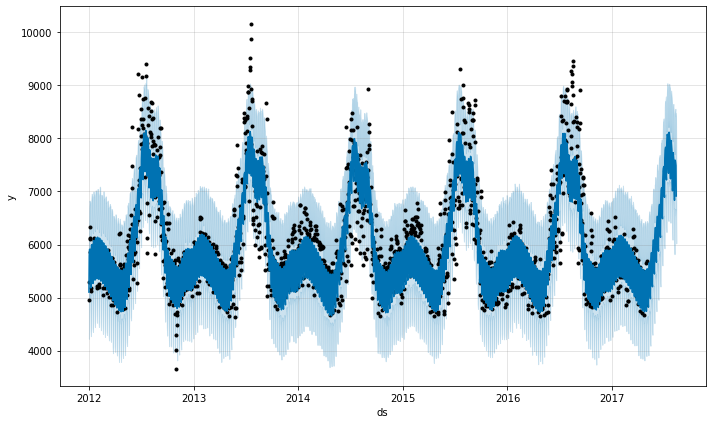

In [29]:
fig1 = m.plot(forecast)

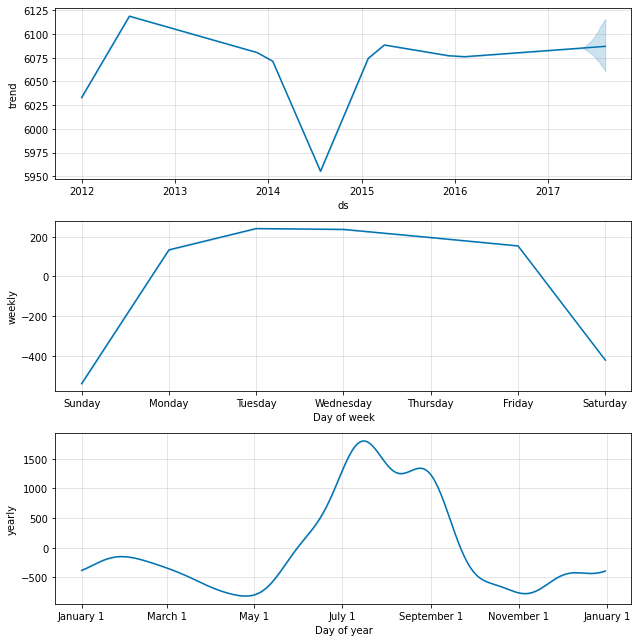

In [30]:
fig2 = m.plot_components(forecast)

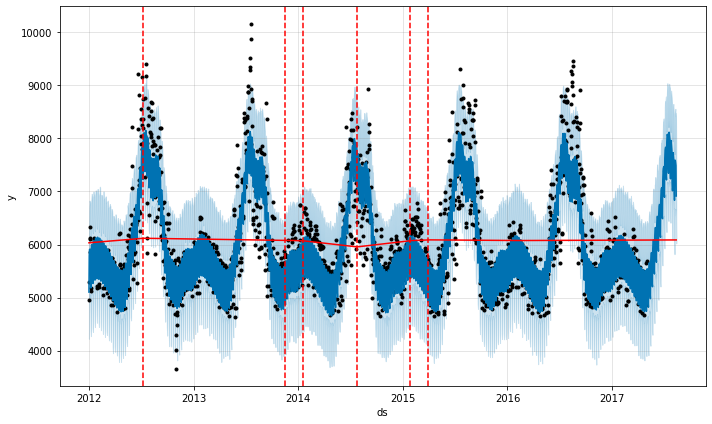

In [31]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [32]:
m.changepoints

62     2012-03-03
125    2012-05-05
187    2012-07-06
249    2012-09-06
312    2012-11-08
374    2013-01-09
437    2013-03-13
499    2013-05-14
561    2013-07-15
624    2013-09-16
686    2013-11-17
748    2014-01-18
811    2014-03-22
873    2014-05-23
935    2014-07-24
998    2014-09-25
1060   2014-11-26
1122   2015-01-27
1185   2015-03-31
1247   2015-06-01
1310   2015-08-03
1372   2015-10-04
1434   2015-12-05
1497   2016-02-06
1559   2016-04-08
Name: ds, dtype: datetime64[ns]

In [33]:
# Plotting a Plotly figure
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast) 
py.iplot(fig)

In [34]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-05 00:00:00 and 2016-05-04 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [35]:
cv_results.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-05-06,5615.229060,4785.114004,6428.420152,5409.750000,2014-05-05
1,2014-05-07,5671.358982,4809.319993,6507.855038,5410.112500,2014-05-05
2,2014-05-08,5710.185920,4831.290235,6550.403235,5488.658333,2014-05-05
3,2014-05-09,5714.214781,4926.738019,6502.687959,5510.075000,2014-05-05
4,2014-05-10,5154.462735,4305.451360,5978.879145,5124.200000,2014-05-05


In [36]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,266167.353695,515.914095,425.046618,0.075698,0.068217,0.879121
1,37 days 00:00:00,272868.056908,522.367741,432.944093,0.076816,0.069615,0.873626
2,37 days 12:00:00,275037.334008,524.440019,436.904616,0.077483,0.070467,0.873626
3,38 days 00:00:00,285090.934872,533.939074,445.002358,0.078498,0.070944,0.868132
4,38 days 12:00:00,286962.036433,535.688376,448.643778,0.079139,0.071273,0.868132
...,...,...,...,...,...,...,...
653,363 days 00:00:00,248302.907482,498.300018,436.392668,0.081457,0.083002,0.978022
654,363 days 12:00:00,249784.596942,499.784551,438.322933,0.081739,0.083193,0.978022
655,364 days 00:00:00,248932.921323,498.931780,436.168695,0.081329,0.083193,0.978022
656,364 days 12:00:00,250195.131840,500.195094,438.168572,0.081688,0.083193,0.978022
